In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
df = pd.read_csv("gold_price.csv", parse_dates=True, index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [4]:
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
train = df['2001':'2018']
test = df['2019']
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [8]:
df.head()


,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,-0.262172,-0.484532


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

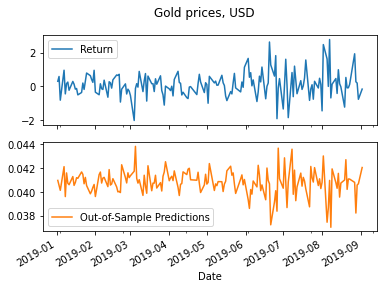

In [10]:
import matplotlib.pyplot as plt
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()